In [1]:
import os
from os.path import dirname
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

sns.set(color_codes=True, style="white")
pd.options.mode.chained_assignment = None  # default='warn'

color = "#9a3324"
fpath_concat = "/Volumes/lsa-nwalter/Guoming_Gao_turbo/Walterlab_server/PROCESSED_DATA/RNA-diffusion-in-FUS/RNAinFUS_PaperFigures/Fig2_diffusion analysis/SPT_results_AIO_concat-0Dex_noTR_0hr.csv"


threshold_disp = 0.2  # unit: um
df_all = pd.read_csv(fpath_concat)
os.chdir(dirname(fpath_concat))

# calculate error bounds
## D formula with errors (MSD: um^2, t: s, D: um^2/s, n: dimension, R: motion blur coefficient; doi:10.1103/PhysRevE.85.061916)
### diffusion dimension = 2. Note: This is the dimension of the measured data, not the actual movements! Although particles are doing 3D diffussion, the microscopy data is a projection on 2D plane and thus should be treated as 2D diffusion!
### MSD = 2 n D tau + 2 n sigma^2 - 4 n R D tau, n=2, R=1/6
### MSD = (4D - 8/6 D) tau + 4 sigma^2
### MSD = 8/3 D tau + 4 sigma^2

In [2]:
s_per_frame = 0.02
localization_error = df_all["linear_fit_sigma"].mean() / 1000
um_per_pxl = 0.117
link_max = 3
log10D_low = np.log10((localization_error**2) / ((8 / 3) * (s_per_frame)))
log10D_high = np.log10(((um_per_pxl * link_max) ** 2) / ((8 / 3) * (s_per_frame)))

# Correlation: What distinguish static?

<Figure size 3600x3000 with 0 Axes>

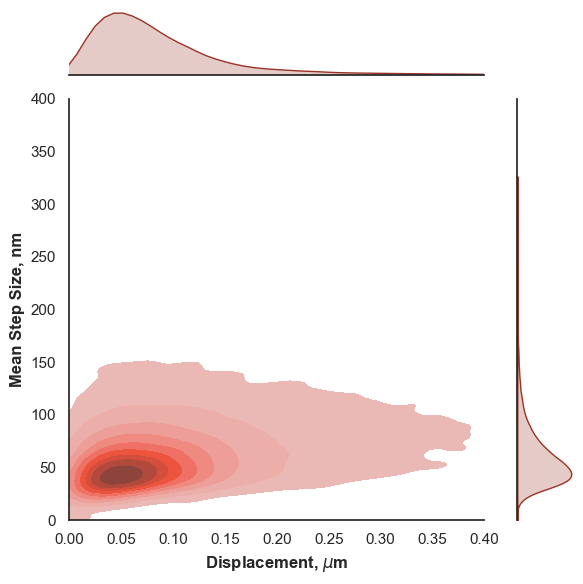

In [3]:
plt.figure(figsize=(6, 5), dpi=600)
sns.jointplot(
    data=df_all,
    x="Displacement_um",
    xlim=(0, 0.4),
    y="mean_stepsize_nm",
    ylim=(0, 400),
    kind="kde",
    fill=True,
    color=color,
)
plt.xlabel(r"Displacement, $\mu$m", weight="bold")
plt.ylabel("Mean Step Size, nm", weight="bold")
plt.tight_layout()
plt.savefig("correlation_Disp_stepsize.png", format="png", bbox_inches="tight", dpi=600)
plt.show()

In [12]:
data = df_all
new_col = []
for _, row in data.iterrows():
    stringlike_x = data['list_of_x']
    stringlike_y = data['list_of_y']
    x = stringlike_x[1:-1].split(", ").astype(float)
    y = stringlike_y[1:-1].split(", ").astype(float)
    d_to_start = np.sqrt((x - x[0])**2 + (y -  y[0])**2)
    new_col.append(d_to_start)
data['d_to_start'] = new_col



AttributeError: 'Series' object has no attribute 'split'

In [13]:
for _, row in data.iterrows():
    stringlike_x = data['list_of_x']
    stringlike_y = data['list_of_y']

In [14]:
stringlike_x

0        [362.2606665733278, 362.5989105468735, 362.601...
1        [28.500386783679595, 29.00954368880632, 29.070...
2        [154.66788351092887, 154.7348945551919, 154.96...
3        [350.5041670399329, 350.2682480123248, 350.262...
4        [344.85172343625214, 344.827576312387, 344.487...
                               ...                        
80053    [297.504892255023, 297.3691559852006, 297.3575...
80054    [223.58596966378312, 221.346162436996, 222.519...
80055    [9.448993643171692, 9.35817543464616, 9.864153...
80056    [290.2467756052853, 291.1855361427132, 290.482...
80057    [102.72089234719935, 102.94439883081144, 103.0...
Name: list_of_x, Length: 80058, dtype: object

In [ ]:
plt.figure(figsize=(6, 5), dpi=600)
sns.jointplot(
    data=data,
    x="d_to_start",
    xlim=(0, 0.4),
    y="mean_stepsize_nm",
    ylim=(0, 400),
    kind="kde",
    fill=True,
    color=color,
)
plt.xlabel(r"Displacement, $\mu$m", weight="bold")
plt.ylabel("Mean Step Size, nm", weight="bold")
plt.tight_layout()
plt.savefig("correlation_Disp_stepsize.png", format="png", bbox_inches="tight", dpi=600)
plt.show()

# Coorelations: Why small R2?

<Figure size 3600x3000 with 0 Axes>

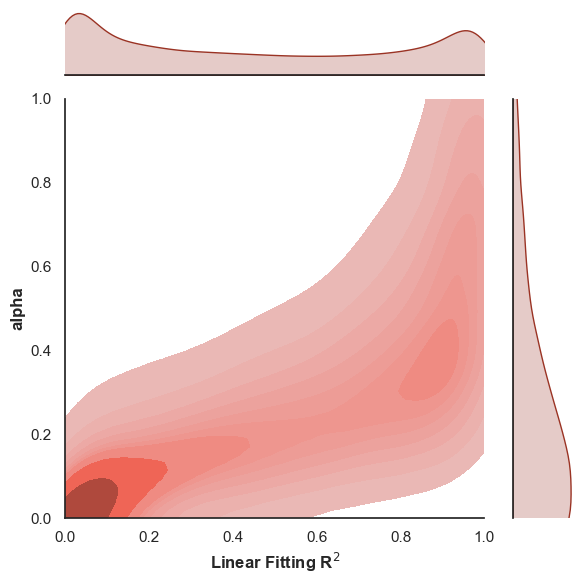

In [10]:
plt.figure(figsize=(6, 5), dpi=600)
sns.jointplot(
    data=df_all[df_all['mean_stepsize_nm'] > 40],
    x="linear_fit_R2",
    xlim=(0, 1),
    y="alpha",
    ylim=(0, 1),
    kind="kde",
    fill=True,
    color=color,
)
plt.xlabel(r"Linear Fitting R$^{2}$", weight="bold")
plt.ylabel("alpha", weight="bold")
plt.tight_layout()
plt.savefig("correlation_linearR2_alpha.png", format="png", bbox_inches="tight", dpi=600)
plt.show()

<Figure size 3600x3000 with 0 Axes>

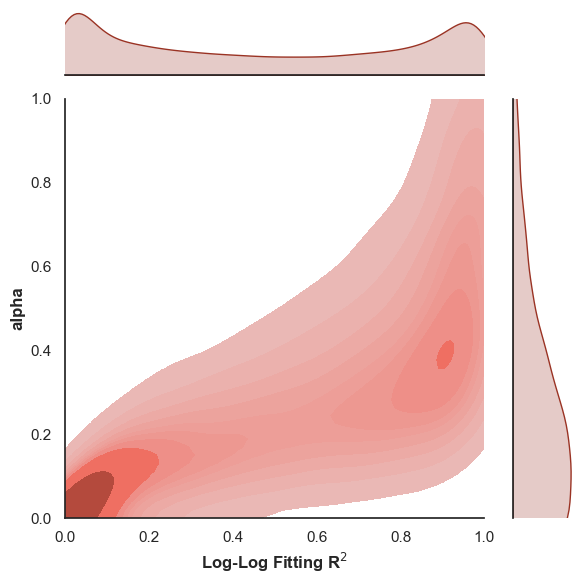

In [5]:
plt.figure(figsize=(6, 5), dpi=600)
sns.jointplot(
    data=df_all,
    x="loglog_fit_R2",
    xlim=(0, 1),
    y="alpha",
    ylim=(0, 1),
    kind="kde",
    fill=True,
    color=color,
)
plt.xlabel(r"Log-Log Fitting R$^{2}$", weight="bold")
plt.ylabel("alpha", weight="bold")
plt.tight_layout()
plt.savefig("correlation_loglogR2_alpha.png", format="png", bbox_inches="tight", dpi=600)
plt.show()

<Figure size 3600x3000 with 0 Axes>

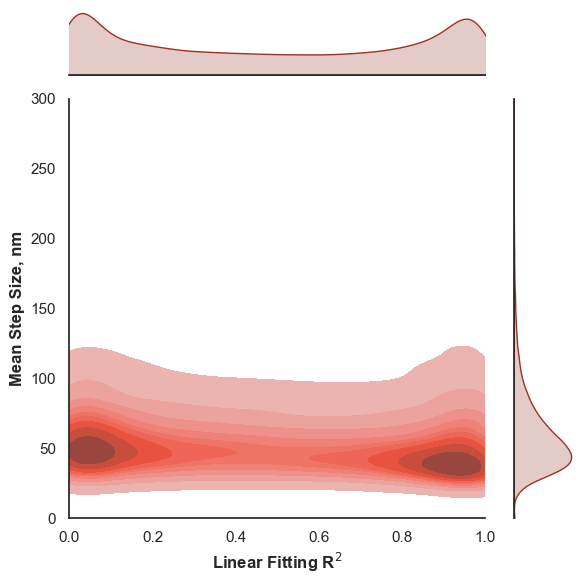

In [6]:
plt.figure(figsize=(6, 5), dpi=600)
sns.jointplot(
    data=df_all,
    x="linear_fit_R2",
    xlim=(0, 1),
    y="mean_stepsize_nm",
    ylim=(0, 300),
    kind="kde",
    fill=True,
    color=color,
)
plt.xlabel(r"Linear Fitting R$^{2}$", weight="bold")
plt.ylabel("Mean Step Size, nm", weight="bold")
plt.tight_layout()
plt.savefig(
    "unused-correlation_linearR2_stepsize.png", format="png", bbox_inches="tight", dpi=600
)
plt.show()

<Figure size 3600x3000 with 0 Axes>

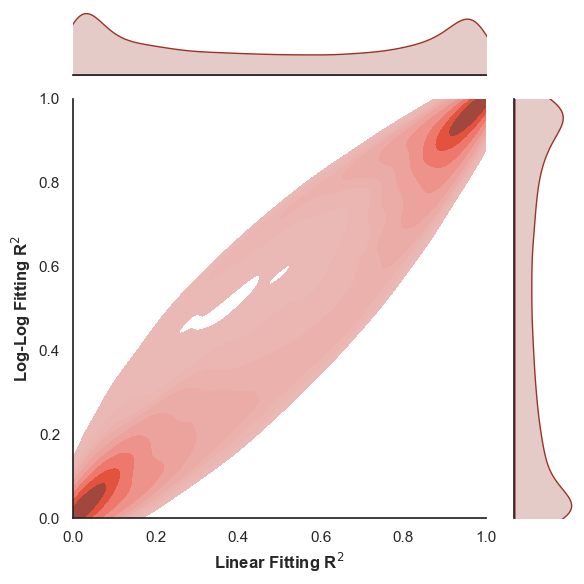

In [7]:
plt.figure(figsize=(6, 5), dpi=600)
sns.jointplot(
    data=df_all,
    x="linear_fit_R2",
    xlim=(0, 1),
    y="loglog_fit_R2",
    ylim=(0, 1),
    kind="kde",
    fill=True,
    color=color,
)
plt.xlabel(r"Linear Fitting R$^{2}$", weight="bold")
plt.ylabel(r"Log-Log Fitting R$^{2}$", weight="bold")
plt.tight_layout()
plt.savefig(
    "unused-correlation_linearR2_loglogR2.png", format="png", bbox_inches="tight", dpi=600
)
plt.show()

<Figure size 3600x3000 with 0 Axes>

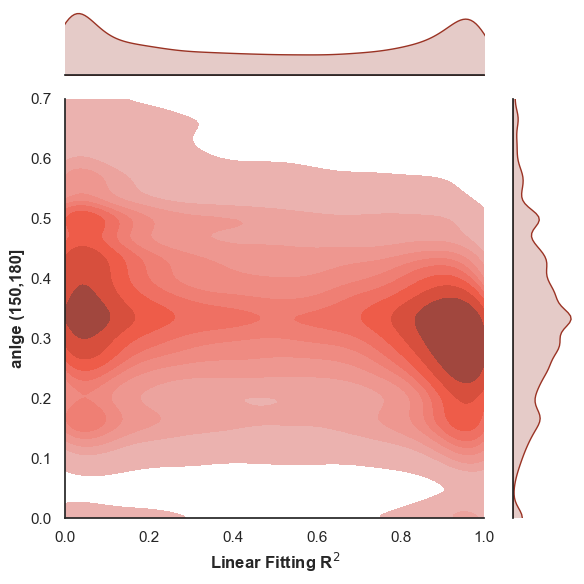

In [8]:
plt.figure(figsize=(6, 5), dpi=600)
sns.jointplot(
    data=df_all,
    x="linear_fit_R2",
    xlim=(0, 1),
    y="(150,180]",
    ylim=(0, 0.7),
    kind="kde",
    fill=True,
    color=color,
)
plt.xlabel(r"Linear Fitting R$^{2}$", weight="bold")
plt.ylabel("anlge (150,180]", weight="bold")
plt.tight_layout()
plt.savefig("unused-correlation_linearR2_angle.png", format="png", bbox_inches="tight", dpi=600)
plt.show()

<Figure size 3600x3000 with 0 Axes>

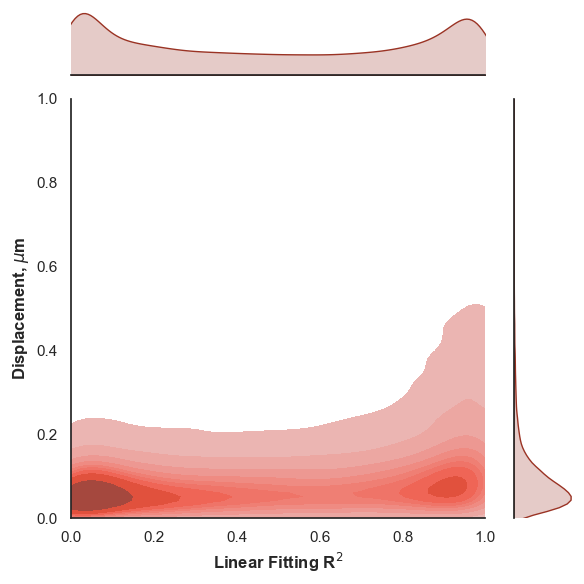

In [9]:
plt.figure(figsize=(6, 5), dpi=600)
sns.jointplot(
    data=df_all,
    x="linear_fit_R2",
    xlim=(0, 1),
    y="Displacement_um",
    ylim=(0, 1),
    kind="kde",
    fill=True,
    color=color,
)
plt.xlabel(r"Linear Fitting R$^{2}$", weight="bold")
plt.ylabel(r"Displacement, $\mu$m", weight="bold")
plt.tight_layout()
plt.savefig(
    "unused-correlation_linearR2_displacement.png", format="png", bbox_inches="tight", dpi=600
)
plt.show()